https://www.gocoder.one/blog/rl-tutorial-with-openai-gym/ 참고

**<문제>**

Q-learing을 이용해서 '**승객을 태우고 목적지까지 최적 이동**'

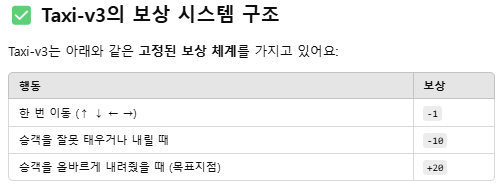

### 1. **라이브러리 설치**

In [16]:
!pip install gym==0.26.2
!pip install numpy==1.23.5
!pip install pygame

import numpy as np
import gym
import random
import time

↓ module 'numpy' has no attribute 'bool8' 해결용

In [17]:
!pip install gymnasium[all]

import gymnasium as gym

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached swig-4.3.0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
  Using cached mujoco_py-2.1.2.14-py3-none-any.whl.metadata (669 bytes)
  Using cached Cython-0.29.37-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
  Using cached mujoco-3.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (44 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached glfw-2.8.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38.p39.p310.p311.p312.p313-none-manylinux_2_28_x86_64.whl.metadata (5.4 kB)
  Using cached fasteners-0.19-py3-none-any.whl.metadata (4.9 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.m

### 2. **Taxi 환경 생성**

In [18]:
env = gym.make("Taxi-v3", render_mode="ansi")  # 'ansi'로 텍스트 렌더링(코랩)

state_size = env.observation_space.n # total number of states (S)
action_size = env.action_space.n # total number of actions (A)

5x5 격자맵, 승객 위치 4곳, 목적지 4곳 → 총 500개 상태(state)

6개 행동: [남, 북, 동, 서, 승객태우기, 승객내리기]

### 3. **Q-테이블**

In [19]:
#초기화
qtable = np.zeros((state_size, action_size))

### 4. **hyperparameter**

In [33]:
learning_rate = 0.9
discount_rate = 0.8  # 미래 보상을 얼마나 중요하게 볼지 (γ)
epsilon = 1.0
decay_rate = 0.005

num_episodes = 5000
max_steps = 100

In [26]:
episode_rewards = []

### 5. **Q-learning 학습**

In [34]:
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qtable[state, :])

        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q(s, a) ← Q(s, a) + α [r + γ * max Q(s', a') - Q(s, a)]

        qtable[state, action] = qtable[state, action] + learning_rate * (
            reward + discount_rate * np.max(qtable[new_state, :]) - qtable[state, action]
        )

        state = new_state
        total_reward += reward
        if done:
            break

    episode_rewards.append(total_reward)
    epsilon = np.exp(-decay_rate * episode)

### 6. **Q-learning 테스트**

In [35]:
state, _ = env.reset()
done = False
rewards = 0

print("\n🚕 TRAINED AGENT\n")

for step in range(max_steps):
    action = np.argmax(qtable[state, :])
    new_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    rewards += reward

    # 텍스트 기반의 렌더링
    output = env.render()
    print(output)
    print(f"Step: {step + 1}, Reward: {reward}, Total Score: {rewards}")
    time.sleep(0.5)

    state = new_state

    if done:
        print("🚀 Episode finished.")
        break

env.close()


🚕 TRAINED AGENT

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 1, Reward: -1, Total Score: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 2, Reward: -1, Total Score: -2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step: 3, Reward: -1, Total Score: -3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 4, Reward: -1, Total Score: -4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 5, Reward: -1, Total Score: -5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step: 6, Reward: -1, Total Score: -6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step: 7, Reward: -1, Total Score: -7
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|

In [36]:
qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.85251635,  -2.31564544,  -2.85251635,  -2.31564544,
         -1.6445568 , -11.31564544],
       [  0.24288   ,   1.5536    ,   0.24288   ,   1.5536    ,
          3.192     ,  -7.44640001],
       ...,
       [  3.19188305,   5.24      ,   3.13695634,   1.54929006,
         -5.80889121,  -5.82140323],
       [ -1.64456455,  -0.805696  ,  -1.64455683,  -0.805696  ,
        -10.64455708, -10.6445568 ],
       [ 11.        ,   7.8       ,  11.        ,  15.        ,
          2.        ,   2.        ]])

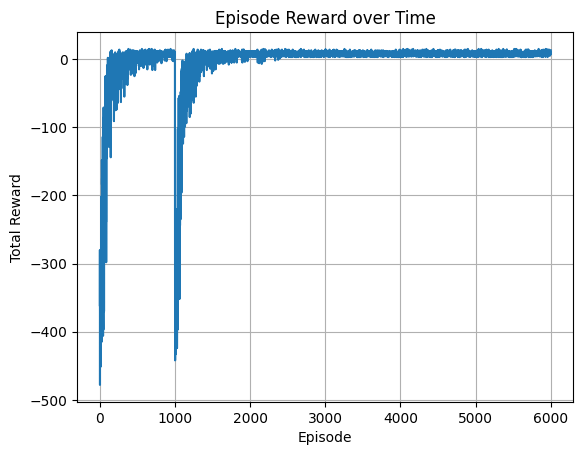

In [37]:
import matplotlib.pyplot as plt

plt.plot(episode_rewards)
plt.title("Episode Reward over Time")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid()
plt.show()

-> n=5000

- 초반에는 탐험 비율 높아서 보상 -(불안정)
- 점점 올바른 행동을 하면서 보상 증가 (성공적일수록 0에 가까움)

->> n=1000 근처에서 **잘못된 정책 학습**을 해서 보상이 급락한 것을 확인할 수 있음

**<보상 급락 예측>**

ε-greedy 탐험 정책 때문

- ε(탐험률) 줄어드는 과정에서 선택 잘못함
- 정책 왜곡..?


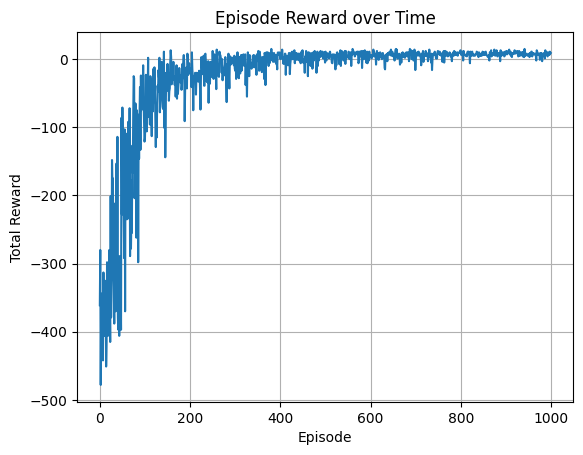

-> 이건 n=1000일 때